In [0]:
from pandas_datareader import data as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
start_date = '2014-01-01'
end_date = '2019-01-05'

In [0]:
def getTicks(items):
  symbols = []
  for i in items: 
    try:
      data = dr.get_data_yahoo(i, start_date, end_date)
    except Exception as e:
      print("there was a problem with {}".format(i))
    else:
      symbols.append(i)
  return symbols

In [0]:
sample_ticks = [
            'MGNX','IRWD', 'SGEN', 'NRC', 'BMRN'                
]

In [0]:
adj = getTicks(sample_ticks)

In [0]:
df = dr.get_data_yahoo(adj, start_date, end_date)
prices = df.loc[:,('Adj Close',slice(None))]

In [0]:
prices.columns = prices.columns.droplevel(0)

In [0]:
from statsmodels.tsa.stattools import pacf,acf

In [0]:
p = prices.copy()

In [48]:
p.head()

Symbols,MGNX,IRWD,SGEN,NRC,BMRN
Date,,,,,
2014-01-02,28.830000,10.175879,40.180000,16.371634,69.269997
2014-01-03,29.480000,10.075377,39.240002,16.106293,69.089996
2014-01-06,29.309999,9.656616,38.570000,16.628134,67.099998
2014-01-07,31.530001,9.572865,40.000000,16.442392,68.540001
2014-01-08,32.259998,10.242881,41.040001,15.681744,69.790001


Text(0.5, 1.0, 'MGNX')

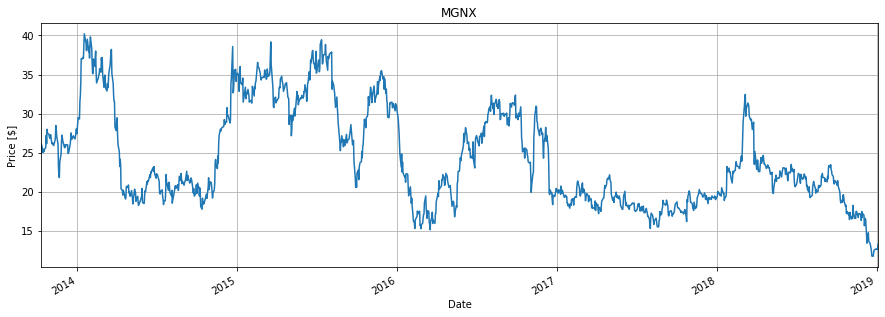

In [0]:
plt.figure(figsize=(15,5))
p.MGNX.plot(grid=True)
plt.ylabel('Price [$]')
plt.title('MGNX')

In [0]:
from statsmodels.graphics import tsaplots

The Following Graphs Below explore the AutoCorrelation and Partial AutoCorrelation Test Method at different lags, which in this case the former tells us that each of the 30 lag variables are statistically significant and there exists significant correlation between lags and the original time series.
Remember=> Positive Lags mean Stickiness, and Negative Lags mean Swings in terms of Sequential Movements. 
In addition, the series may contain seasonality if lag variables show patterns in multiples. 
Correlation is a good property of time series. It means there is more information with which we can improve our forecast. 

AC can be used to detect seasonality in the original time series and following the forecast, to detect if there is any remaining information in the residual series. 
PACF serves a similar purpose, ultimately telling us the number of significant lags in the lagged data set. 

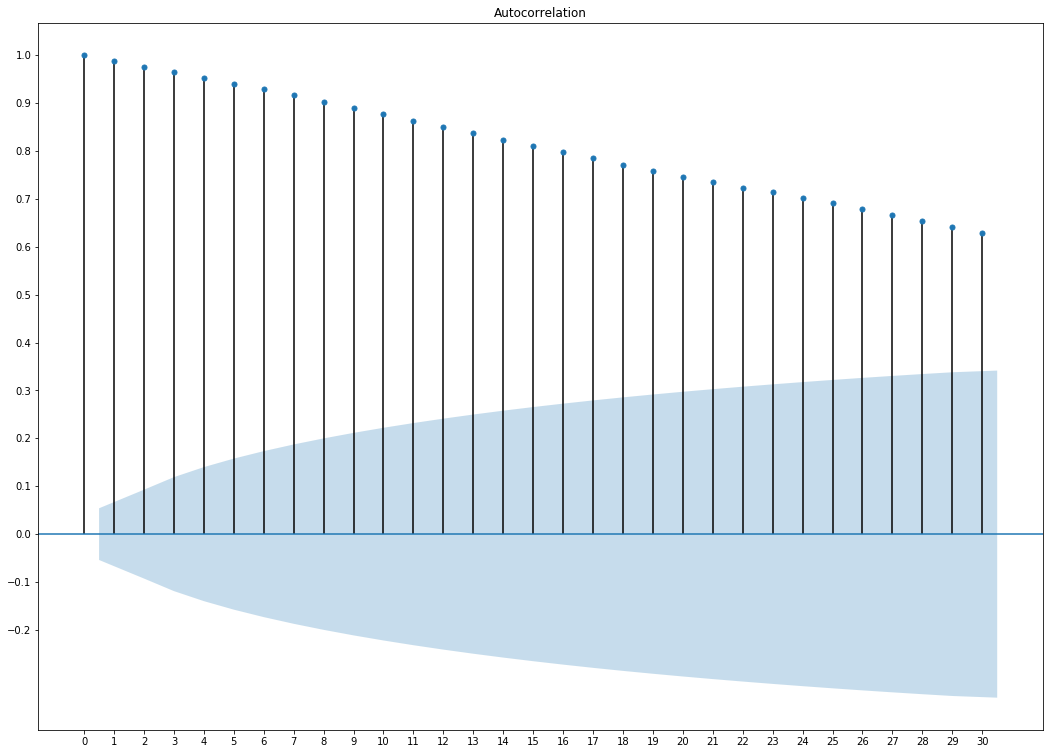

In [0]:
plt.rcParams['figure.figsize'] = [18,13]
acf = tsaplots.plot_acf(p,lags=30)
plt.yticks(np.arange(-.2, 1.1, step=0.1))
plt.xticks(np.arange(0, 31, step=1))
plt.show()

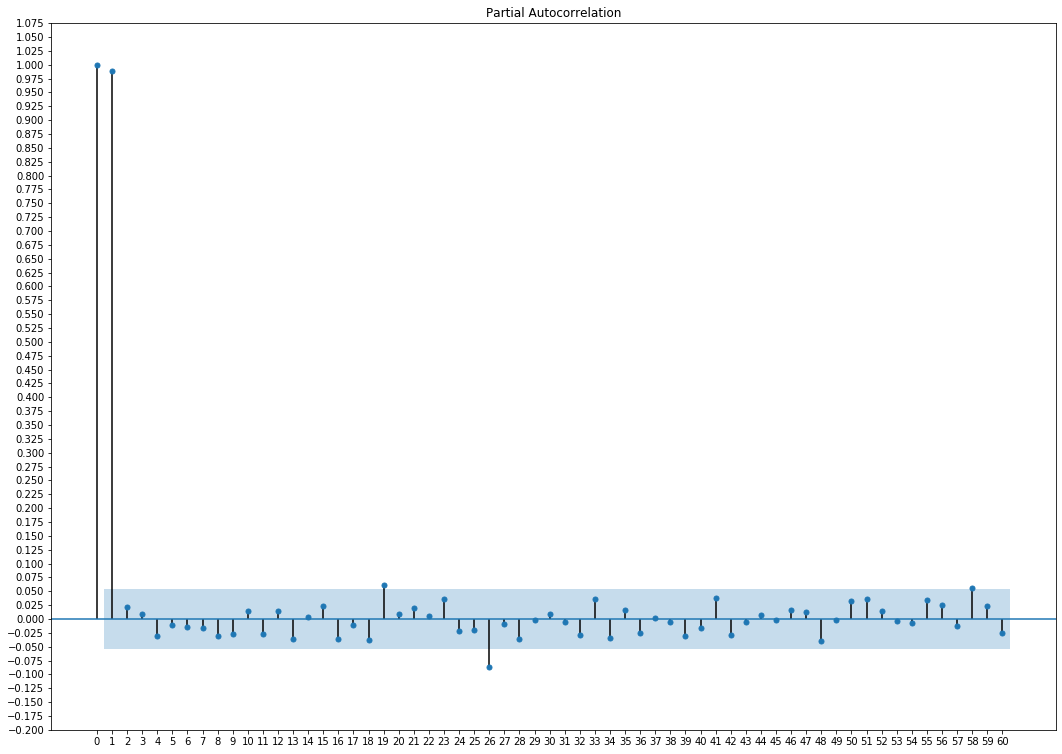

In [0]:
plt.rcParams['figure.figsize'] = [18,13]
pacf1 = tsaplots.plot_pacf(p,lags=60)

plt.yticks(np.arange(-.2, 1.1, step=0.025))
plt.xticks(np.arange(0, 61, step=1))
plt.show()

In [0]:
pac1 = tsaplots.pacf(p,nlags=60)
pac1[pac1 >= .025]

array([1.        , 0.98841103, 0.06192557, 0.03642863, 0.03679394,
       0.03824753, 0.03254201, 0.03640029, 0.03442009, 0.05502959])

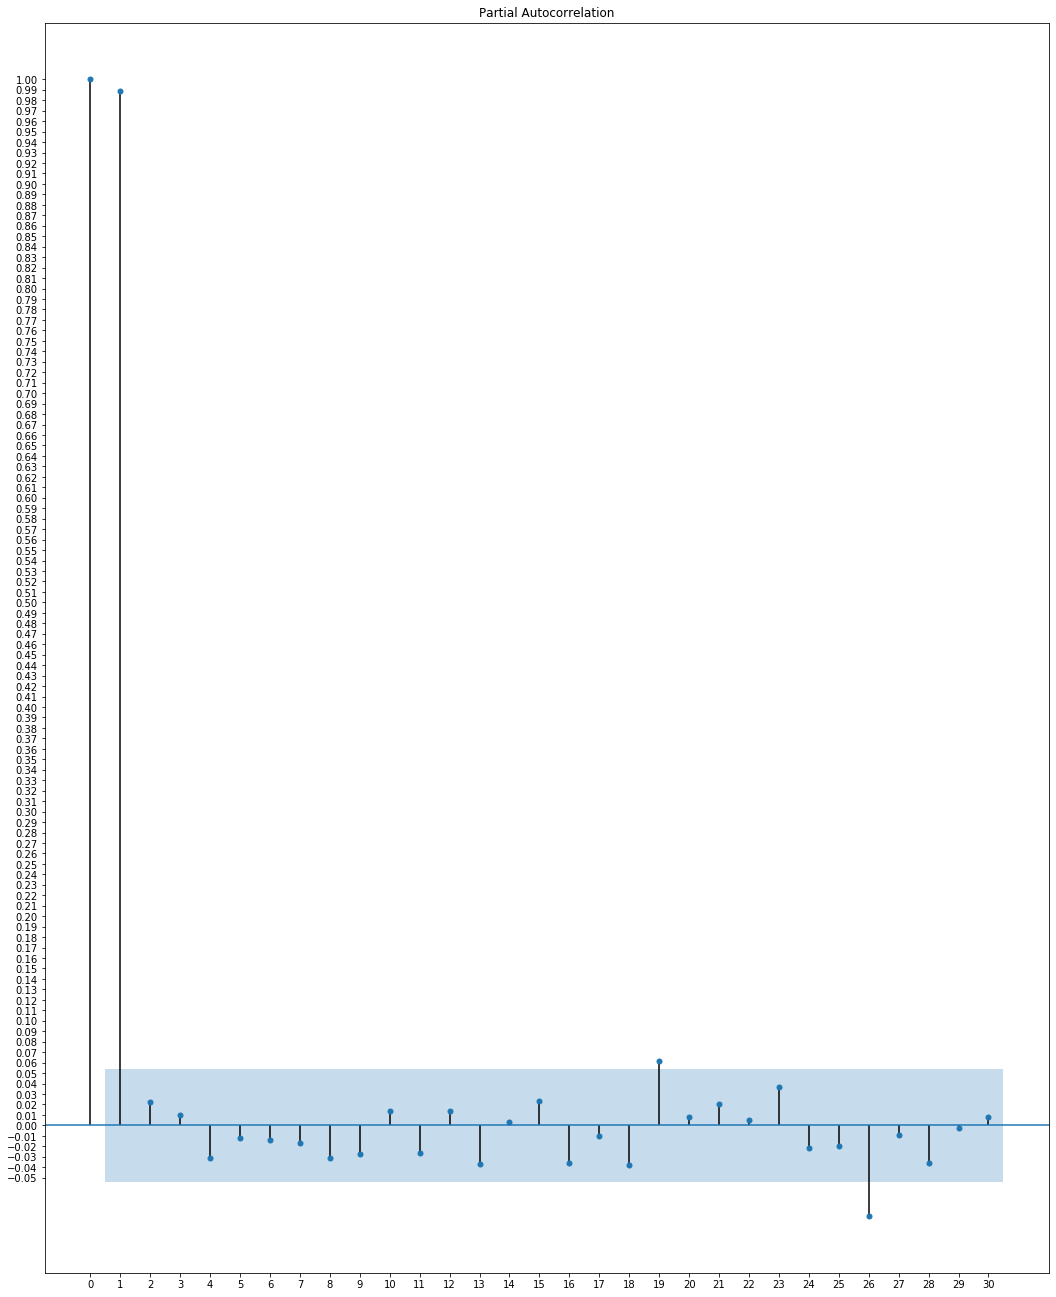

In [0]:
plt.rcParams['figure.figsize'] = [18,23]
pacf2= tsaplots.plot_pacf(p,lags=30)

plt.yticks(np.arange(-.05, 1.01, step=0.01))
plt.xticks(np.arange(0, 31, step=1))
plt.show()

In [0]:
pac2 = tsaplots.pacf(p,nlags=30)
pac2[pac2 >= .025]

array([1.        , 0.98841103, 0.06192557, 0.03642863])

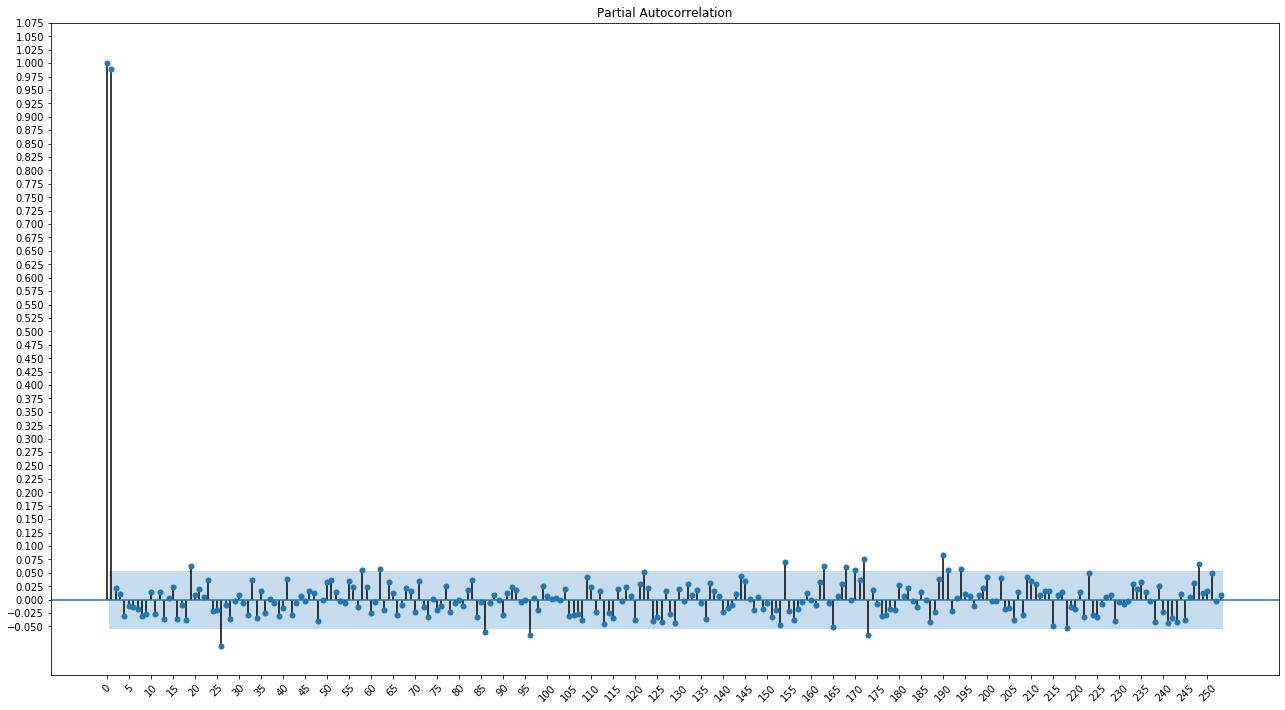

In [0]:
plt.rcParams['figure.figsize'] = [22,12]

pacf3 = tsaplots.plot_pacf(p,lags=253)
plt.yticks(np.arange(-.05, 1.1, step=0.025))
plt.xticks(np.arange(0, 253, step=5),rotation='45')
plt.show()

In [0]:
pac3 = tsaplots.pacf(p,nlags=253)
pac3[pac3 >= .025]

array([1.        , 0.98841103, 0.06192557, 0.03642863, 0.03679394,
       0.03824753, 0.03254201, 0.03640029, 0.03442009, 0.05502959,
       0.05766537, 0.03214387, 0.03485302, 0.02550899, 0.037249  ,
       0.02625693, 0.04257469, 0.02885496, 0.05187217, 0.02882667,
       0.03153496, 0.04309262, 0.0338579 , 0.06936692, 0.03343794,
       0.06226018, 0.02924807, 0.06054057, 0.05474397, 0.03634721,
       0.07531833, 0.02713301, 0.03862284, 0.08299008, 0.05539093,
       0.05657049, 0.04296427, 0.03963018, 0.04263601, 0.0348234 ,
       0.02970437, 0.04890031, 0.03000375, 0.03197894, 0.02505   ,
       0.03133258, 0.06727735, 0.04902923])

Statistics with T Tests on MGNX and Tickers with Neighboring Sortino Ratios (MGNX, IRWD, SGEN, NRC, BMRN)

In [49]:
p.head()

Symbols,MGNX,IRWD,SGEN,NRC,BMRN
Date,,,,,
2014-01-02,28.830000,10.175879,40.180000,16.371634,69.269997
2014-01-03,29.480000,10.075377,39.240002,16.106293,69.089996
2014-01-06,29.309999,9.656616,38.570000,16.628134,67.099998
2014-01-07,31.530001,9.572865,40.000000,16.442392,68.540001
2014-01-08,32.259998,10.242881,41.040001,15.681744,69.790001


In [0]:
from scipy import stats

Null Hypothesis: The expectation of MGNX and IRWD prices are identical

In [30]:
stats.ttest_ind(p.MGNX, p.IRWD)

Ttest_indResult(statistic=64.30519106028764, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01. 

Null Hyp: The expectation of MGNX and SGEN prices are identical

In [50]:
stats.ttest_ind(p.MGNX, p.SGEN)

Ttest_indResult(statistic=-64.27189520900016, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01.

Null Hyp: The expectation of MGNX and NRC prices are identical

In [51]:
stats.ttest_ind(p.MGNX, p.NRC)

Ttest_indResult(statistic=12.313260390752081, pvalue=7.091080342619525e-34)

Reject the Null Hypothesis with p < 0.01. 

Null Hyp: The expectation of MGNX and BMRN prices are identical

In [52]:
stats.ttest_ind(p.MGNX, p.BMRN)

Ttest_indResult(statistic=-125.54418524107258, pvalue=0.0)

Reject the Null Hypothesis with p < 0.01. 

Summary: 
Since the p value for all tickers were the same with an outcome to reject the null, the results could be useful as evidence in our pursuit to use these tickers as predictors in a standard regression, depending on our response variable.